In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
# import the libraby you need here

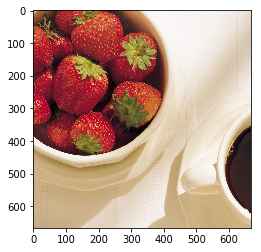

In [21]:
rgbimg = cv2.cvtColor(cv2.imread("image.jpg",cv2.IMREAD_COLOR), cv2.COLOR_BGR2RGB)
plt.figure()
plt.imshow(rgbimg)

C:\Users\jason\Anaconda3\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: invalid value encountered in double_scalars


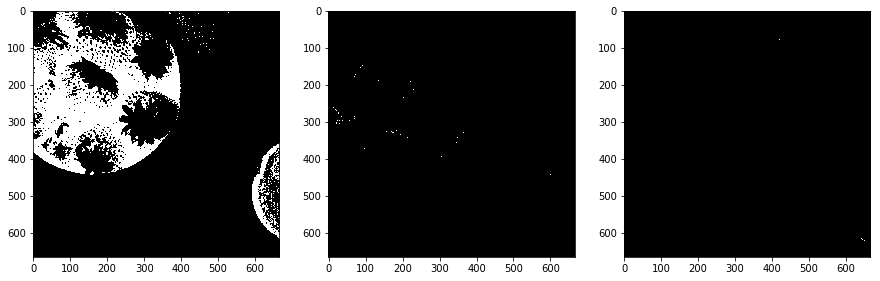

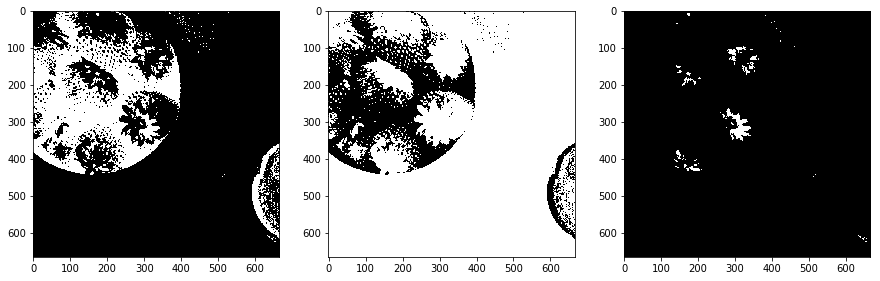

In [22]:
#  show each components in different color models
def rgb2hsi(rgbimg):
    # convert rgb images to hsi images
    # Hint: Normalize Hue value to [0,255] for demonstration purpose.
    '''your code here'''
    F=rgbimg.shape #(height, width, channel)
    f1,f2,f3 = F
    H = np.ones((f1,f2),dtype=int)
    S = np.ones((f1,f2),dtype=int)
    I = np.ones((f1,f2),dtype=int)
    r = rgbimg[0:f1,0:f2,0]
    g = rgbimg[0:f1,0:f2,1]
    b = rgbimg[0:f1,0:f2,2]
    r, g, b = r/255, g/255, b/255
    ROW = list(range(f1))
    COL = list(range(f2))
    for row in ROW:
        for col in COL:  
            num = 0.5 * ((r[row,col]-g[row,col])+(r[row,col]-b[row,col]))
            den = np.sqrt((r[row,col]-g[row,col])**2+(r[row,col]-b[row,col])*(g[row,col]-b[row,col]))
            theta = float(np.arccos(num/den))
            if den == 0:
                    H[row,col] = 0
            elif b[row,col] <= g[row,col]:
                H[row,col] = theta
            else:
                H[row,col] = 360 - theta

            min_RGB = min(b[row,col], g[row,col], r[row,col])
            sum_RGB = b[row,col]+g[row,col]+r[row,col]          
            S[row,col] = 1 - 3*min_RGB/sum_RGB
            I[row,col] = sum_RGB/3
    h = H*255
    s = S*255
    i = I*255
    return h,s,i

def hsi2rgb(hsiimg):
    # convert hsi images to rgb images
    '''your code here'''
    F=hsiimg.shape #(height, width, channel)
    f1,f2,f3 = F
    R = np.ones((f1,f2),dtype=int)
    G = np.ones((f1,f2),dtype=int)
    B = np.ones((f1,f2),dtype=int)
    h = hsiimg[0:f1,0:f2,0]
    s = hsiimg[0:f1,0:f2,1]
    i = hsiimg[0:f1,0:f2,2]
    h, s, i = h/255, s/255, i/255
    ROW = list(range(f1))
    COL = list(range(f2))   
    for row in ROW:
        for col in COL:
            if h[row,col] <= 0:
                B[row,col] = (1-s[row,col])/3
                R[row,col] = (1+(s[row,col]*np.cos(h[row,col])/np.cos(60-h[row,col])))/3
                G[row,col] = 1-(R[row,col]+B[row,col])         
            elif h[row,col] > 120 and h[row,col] <= 240 :
                h[row,col] = H[row,col] - 120
                R[row,col] = (1-s[row,col])/3
                G[row,col] = (1+(s[row,col]*np.cos(h[row,col])/np.cos(60-h[row,col])))/3
                B[row,col] = 1-(R[row,col]+G[row,col])    
            elif h[row,col] > 240 and h[row,col] <= 360 :
                h[row,col] = h[row,col] - 240               
                G[row,col] = (1-s[row,col])/3
                B[row,col] = (1+(s[row,col]*np.cos(h[row,col])/np.cos(60-h[row,col])))/3
                R[row,col] = 1-(B[row,col]+G[row,col]) 
    r = R*255
    g = G*255
    b = B*255
    return r,g,b

# rgb2hsi
h,s,i = rgb2hsi(rgbimg)
# show the result
plt.figure(figsize = (15,10))
plt.subplot(1,3,1)
plt.imshow(h,cmap='gray')
plt.subplot(1,3,2)
plt.imshow(s,cmap='gray')
plt.subplot(1,3,3)
plt.imshow(i,cmap='gray')

# construct hsi images
hsiimg = np.zeros((rgbimg.shape[0],rgbimg.shape[1],3))
hsiimg[:,:,0] = h
hsiimg[:,:,1] = s
hsiimg[:,:,2] = i

# hsi2rgb
r,g,b = hsi2rgb(hsiimg)
# show the result
plt.figure(figsize = (15,10))
plt.subplot(1,3,1)
plt.imshow(r,cmap='gray')
plt.subplot(1,3,2)
plt.imshow(g,cmap='gray')
plt.subplot(1,3,3)
plt.imshow(b,cmap='gray')

### Question 1

Q:  We can actually find discontinuity in hue(H) component of the image that is hard to interpret. 
    In this case, it is especially apparent around the strawberries, which are depicted in gray level values near both black         and white.
    Why is that?     
    
A:因為hue(H)值是用極坐標的極角表示，使用角度之度量取值，用範圍為0～360°來表示色彩信息，即所處的光譜顏色的位置，因此只要面臨光譜顏色的快速變化時就會有不連續性的產生。

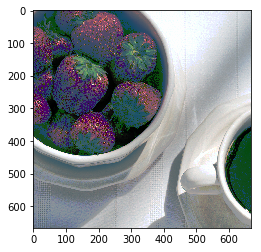

In [23]:
# histogram equalization
def histogram_equalization(input):
    #choose the color model that is most suitable for histogram equalization.
    ''' your code here'''
    F=input.shape #(height, width, channel)
    f1,f2,f3 = F
    H = np.ones((f1,f2),dtype=int)
    S = np.ones((f1,f2),dtype=int)
    I = np.ones((f1,f2),dtype=int)
    rr = r1 = np.zeros((256,1),dtype=int)
    bb = b1 = np.zeros((256,1),dtype=int)
    gg = g1 = np.zeros((256,1),dtype=int)
    r = input[0:f1,0:f2,0]
    r_his = input[0:f1,0:f2,0]
    g = input[0:f1,0:f2,1]
    g_his = input[0:f1,0:f2,1]
    b = input[0:f1,0:f2,2]
    b_his = input[0:f1,0:f2,2]
    ROW = list(range(f1))
    COL = list(range(f2))
    C_R = list(range(256))
    aa=0;a1=0;a2=0 
    for row in ROW:
        for col in COL:
            rrr = r[row,col]
            ggg = g[row,col]
            bbb = b[row,col]
            rr[rrr,0]=rr[rrr,0]+1
            gg[ggg,0]=gg[ggg,0]+1
            bb[bbb,0]=bb[bbb,0]+1        
    for cr in C_R :
        if rr[cr,0] != 0 and aa == 0 :
            rr[cr,0] = rr[cr,0] 
            aa = cr
        if rr[cr,0] != 0 and aa != 0 :    
            rr[cr,0] = rr[cr,0] + rr[aa,0]
            aa = cr    
        if gg[cr,0] != 0 and a1 == 0 :
            gg[cr,0] = gg[cr,0] 
            a1 = cr
        if gg[cr,0] != 0 and a1 != 0 :    
            gg[cr,0] = gg[cr,0] + gg[a1,0]
            a1 = cr       
        if bb[cr,0] != 0 and a2 == 0 :
            bb[cr,0] = bb[cr,0] 
            a2 = cr
        if bb[cr,0] != 0 and a2 != 0 :    
            bb[cr,0] = bb[cr,0] + bb[a2,0]
            a2 = cr                        
    m = min(i for i in rr if i > 0)
    m1 = min(i for i in gg if i > 0)
    m2 = min(i for i in bb if i > 0)    
    for cr in C_R :
        if rr[cr,0] != 0 :
            r1[cr,0] = ((rr[cr,0]-m)/((f1*f2)-m))*255
            r_his[r==cr]=r1[cr,0]
        if gg[cr,0] != 0 :
            g1[cr,0] = ((gg[cr,0]-m1)/((f1*f2)-m1))*255 
            g_his[g==cr]=g1[cr,0]
        if bb[cr,0] != 0 :
            b1[cr,0] = ((bb[cr,0]-m2)/((f1*f2)-m2))*255  
            b_his[b==cr]=b1[cr,0]
    heimage = np.zeros((f1,f2,3))
    heimage[:,:,0] = r_his/255
    heimage[:,:,1] = g_his/255
    heimage[:,:,2] = b_his/255
    return heimage
    #return heimage
    
heimage = histogram_equalization(rgbimg) #choose the color model you want to use as input here (rgbimg or hsiimg)
    
plt.figure()
plt.imshow(heimage)

### Question 2

Q: which color model do you use? Briefly explain the reason why.

A:我選用的是RGB color model來進行histogram equalization，因為在GRB中顏色由三個值共同決定，並且在日常生活中很常用到RGB色彩空間。

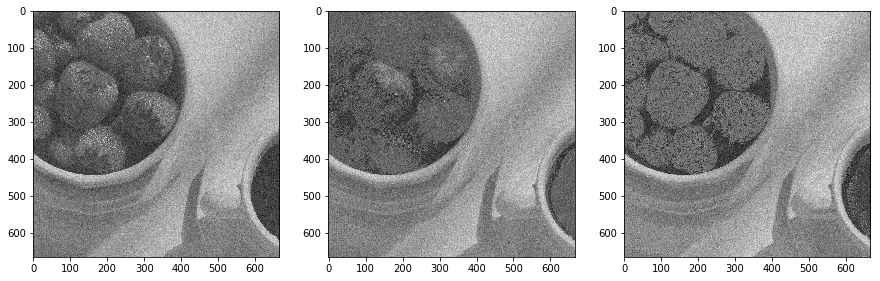

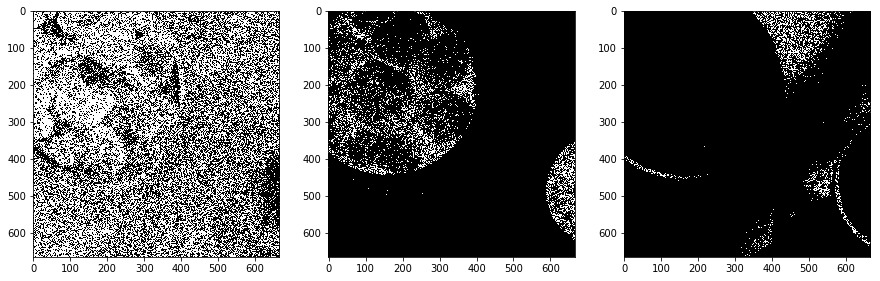

In [26]:
# converting noisy RGB images HSI
gaussian = np.random.normal(0, 28, (rgbimg.shape[0],rgbimg.shape[1],3))
noisy_rgb = rgbimg + gaussian
(r, g, b) = cv2.split(noisy_rgb)
plt.figure(figsize = (15,10))
plt.subplot(1,3,1)
plt.imshow(r,cmap='gray')
plt.subplot(1,3,2)
plt.imshow(g,cmap='gray')
plt.subplot(1,3,3)
plt.imshow(b,cmap='gray')

noisy_h,noisy_s,noisy_i = rgb2hsi(noisy_rgb)
plt.figure(figsize = (15,10))
plt.subplot(1,3,1)
plt.imshow(noisy_h,cmap='gray')
plt.subplot(1,3,2)
plt.imshow(noisy_s,cmap='gray',vmin=0,vmax=1)
plt.subplot(1,3,3)
plt.imshow(noisy_i,cmap='gray')

### Question 3

Q:  Briefly compare the different results of six components from two different color models (R,G,B,H,S,I).
    What components in the HSI model are severely disturbed? Why is that?

A: HSI彩色模行是用色調(Hue)、飽和度(Saturation)及亮度(Intensity)來對色彩空間進行描述，可以透過比較發現S受Gaussian Noise的影響最大、其次是I、最後是H，原因在於高斯雜訊的覆蓋不會根本改變原始圖片內的顏色，所以H所受的影響最小，但飽和度與亮度受到的影響改變，所以S跟I受到較大影響。